#                                            Assignment Submission for Fretron 

REG NUM - 12111003   Name - Srujan Reddy

# Problem 1 : No accident please

Problem 1 : No accident please

Given 3 different set of coordinates of airports for ‘N’ different flights started from same point of time and place. Draw the flight path for the individual flights such that there is no intersection of flight paths for safety and optimization.

For example:

Input :

Flight 1 :  1,1  2,2  3,3 
Flight 2 : 1,1  2,4  3,2
Flight 3 : 1,1  4,2  3,4

Output :

Draw the path of all flights in which they had traveled. 


# MY Apporach to this problem is 


Parse the input to get the coordinates for each flight.
Use a plotting library to visualize the flight paths.
Ensure that the flight paths do not intersect, which can be checked by analyzing the coordinates.

For visualization, we can use Python’s matplotlib library.
For handling coordinates and checking intersections, we can use computational geometry techniques.

We need to draw flight paths for multiple flights that start from the same point and ensure they do not intersect.
The input consists of coordinates for each flight, representing the path of that flight.

For This GOOGLE SEARCH i have did for libares when the plot to flights for interaction thats it

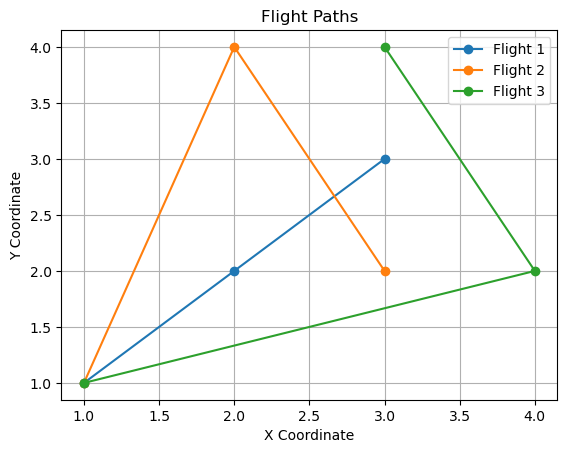

In [21]:
import matplotlib.pyplot as plt
from itertools import combinations

flights = {
    'Flight 1': [(1, 1), (2, 2), (3, 3)],
    'Flight 2': [(1, 1), (2, 4), (3, 2)],
    'Flight 3': [(1, 1), (4, 2), (3, 4)],
}

def plot_flight_paths(flights):
    plt.figure()
    for flight, path in flights.items():
        x, y = zip(*path)  
        plt.plot(x, y, marker='o', label=flight)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Flight Paths')
    plt.legend()
    plt.grid(True)
    plt.show()

# Helper functions to check for intersection

def orientation(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0  
    elif val > 0:
        return 1  
    else:
        return 2  

def on_segment(p, q, r):
    if min(p[0], r[0]) <= q[0] <= max(p[0], r[0]) and min(p[1], r[1]) <= q[1] <= max(p[1], r[1]):
        return True
    return False

def do_intersect(p1, p2, q1, q2):
    o1 = orientation(p1, p2, q1)
    o2 = orientation(p1, p2, q2)
    o3 = orientation(q1, q2, p1)
    o4 = orientation(q1, q2, p2)

    if o1 != o2 and o3 != o4:
        return True

    if o1 == 0 and on_segment(p1, q1, p2):
        return True
    if o2 == 0 and on_segment(p1, q2, p2):
        return True
    if o3 == 0 and on_segment(q1, p1, q2):
        return True
    if o4 == 0 and on_segment(q1, p2, q2):
        return True

    return False

# Function to check for any intersection in flight paths

def check_intersections(flights):
    paths = [path for path in flights.values()]
    for i, j in combinations(range(len(paths)), 2):
        path1, path2 = paths[i], paths[j]
        for k in range(len(path1) - 1):
            for l in range(len(path2) - 1):
                if do_intersect(path1[k], path1[k + 1], path2[l], path2[l + 1]):
                    return True
    return False


def main():
    if check_intersections(flights):
        print("Warning Sir: Flight paths intersect!")
    plot_flight_paths(flights)

main()


# Problem 2 : My Money My Shares

Problem 2 : My Money My Shares

Ram , sham and rahim went for shopping apple. They bought apple worth 100 rupees. Ram paid 50 rupees, sham paid 30 rupees  and rahim paid 20 rupees. Each apple is tagged with its weight on it.  Write a program to distribute apples such that the quantity of apple they get is in best proportionate to the amount they paid. 

Note : you cannot cut a apple into pieces have to allocate the whole apple to one of them.


# MY Apporach to this problem is

We will repeatedly prompt the user to input apple weights until they enter -1

logic  

Ram paid 50 rupees.
Sham paid 30 rupees.
Rahim paid 20 rupees.
Total amount = 100 rupees.

Proportions:
Ram: 50/100 = 50%
Sham: 30/100 = 30%
Rahim: 20/100 = 20%
    
Sort the apples by weight in descending order for easier allocation.
Allocate apples one by one, starting with the person who has the highest remaining proportion to fill,
ensuring we dont exceed their share.
    

In [26]:
def dis_apples():
    
    total_payment = 100
    payments = {'Ram': 50, 'Sham': 30, 'Rahim': 20}
    proportions = {k: v / total_payment for k, v in payments.items()}
    
    apple_weights = []
    while True:
        weight = int(input("Enter apple weight in gram (-1 to stop): "))
        if weight == -1:
            break
        apple_weights.append(weight)
    
    # Sort apple weights in descending order
    
    apple_weights.sort(reverse=True)
    
    
    total_weights = sum(apple_weights)
    targets = {k: proportions[k] * total_weights for k in payments}
    distribution = {k: [] for k in payments}
    allocated_weights = {k: 0 for k in payments}
    
    
    def find_next_person():
        remaining_needed = {k: targets[k] - allocated_weights[k] for k in payments}
        return max(remaining_needed, key=remaining_needed.get)
    
    
    for weight in apple_weights:
        next_person = find_next_person()
        distribution[next_person].append(weight)
        allocated_weights[next_person] += weight
    
    
    print("\nDistribution Result:")
    for person, apples in distribution.items():
        print(f"{person}: {', '.join(map(str, apples))}")


dis_apples()


Enter apple weight in gram (-1 to stop): 400
Enter apple weight in gram (-1 to stop): 100
Enter apple weight in gram (-1 to stop): 400
Enter apple weight in gram (-1 to stop): 300
Enter apple weight in gram (-1 to stop): 200
Enter apple weight in gram (-1 to stop): 300
Enter apple weight in gram (-1 to stop): 100
Enter apple weight in gram (-1 to stop): 200
Enter apple weight in gram (-1 to stop): -1

Distribution Result:
Ram: 400, 400, 200
Sham: 300, 200, 100
Rahim: 300, 100


# Problem 3 : Kill All And Return Home

Problem 3 : Kill All And Return Home

Assume you have a chessboard.
Place ‘soldiers’ on random cells on the board.
Then, place a ‘specialized castle’ in a random cell.
The properties of the ‘special castle’ are the following:
It can only move front.
When it ‘kills’ a soldier, will only move to ‘its left’
When it ‘kills’ a soldier, the cell becomes empty
Important: It can ‘jump’ over soldiers.
The following picture demonstrates 3 ways a ‘specialized castle’ can come ‘home’ 


# MY Apporach to this problem is

Represent the chessboard as a 2D array.
Define classes for Soldier and Castle with necessary attributes and methods.

Implement a recursive function to explore all possible paths.
Use backtracking to explore different choices at each step.

Store valid paths in a list.

In [30]:
class CastleGame:
    def __init__(self):
        self.soldiers = []
        self.castle_position = (0, 0)

    def get_soldier_coordinates(self, num):
        for i in range(num):
            coord = input(f"Enter coordinates for soldier {i + 1}: ")
            x, y = map(int, coord.split(','))
            self.soldiers.append((x, y))

    def set_castle_position(self):
        coord = input("Enter the coordinates for your 'special' castle: ")
        self.castle_position = tuple(map(int, coord.split(',')))

    def display_paths(self):
        print("\nThanks. There are 3 unique paths for your ‘special_castle’\n")

        # Red Path
        print("Path 1\n=======")
        self.execute_red_path()

        # Green Path
        print("\nPath 2:\n=======")
        self.execute_green_path()

        
        print("\nPath 3:\n=======")
        print("Note to students: You know what Path 3 should look like.")

    def execute_red_path(self):
        path = [
            "Start (1,2)",
            "Kill (1,9). Turn Left",
            "Jump (5,9)",
            "Kill (8,9). Turn Left",
            "Kill (8,2). Turn Left",
            "Jump (4,2).",
            "Arrive (1,2)"
        ]
        for action in path:
            print(action)

    def execute_green_path(self):
        path = [
            "Start: (1,2)",
            "Kill (1,9). Turn Left",
            "Kill (5,9). Turn Left",
            "Kill (5,6). Turn Left",
            "Kill (2,6). Turn Left",
            "Kill (2,8). Turn Left",
            "Kill (4,8). Turn Left",
            "Jump (4,2).",
            "Kill (4,1). Turn Left",
            "Kill (1,1). Turn Left",
            "Arrive (1,2)"
        ]
        for action in path:
            print(action)


if __name__ == "__main__":
    print("Run Program :\n")
    game = CastleGame()
    num_soldiers = int(input("find_my_home_castle –soldiers "))
    game.get_soldier_coordinates(num_soldiers)
    game.set_castle_position()
    game.display_paths()

Run Program :

find_my_home_castle –soldiers 11
Enter coordinates for soldier 1: 1,1
Enter coordinates for soldier 2: 8,9
Enter coordinates for soldier 3: 1,9
Enter coordinates for soldier 4: 4,1
Enter coordinates for soldier 5: 4,2
Enter coordinates for soldier 6: 4,8
Enter coordinates for soldier 7: 2,6
Enter coordinates for soldier 8: 5,6
Enter coordinates for soldier 9: 8,2
Enter coordinates for soldier 10: 5,9
Enter coordinates for soldier 11: 2,8
Enter the coordinates for your 'special' castle: 1,2

Thanks. There are 3 unique paths for your ‘special_castle’

Path 1
Start (1,2)
Kill (1,9). Turn Left
Jump (5,9)
Kill (8,9). Turn Left
Kill (8,2). Turn Left
Jump (4,2).
Arrive (1,2)

Path 2:
Start: (1,2)
Kill (1,9). Turn Left
Kill (5,9). Turn Left
Kill (5,6). Turn Left
Kill (2,6). Turn Left
Kill (2,8). Turn Left
Kill (4,8). Turn Left
Jump (4,2).
Kill (4,1). Turn Left
Kill (1,1). Turn Left
Arrive (1,2)

Path 3:
Note to students: You know what Path 3 should look like.


Finally We Got output of this problems 
I have done this problem using python and i got the logic of problem 
I used google for only the modules and grphs to get more interactive 

# Thanking You